In [1]:
#Imports
import os
import numpy as np                 # For array operations
import pandas as pd                # For DataFrames
import matplotlib.pyplot as plt    # For plotting

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score



%matplotlib inline

In [2]:
os.chdir("E:\HSAI\decision tree")

In [3]:
df = pd.read_csv('bank.csv', delimiter=',')    # Read the csv file with ';' delimiter
print(df.shape)                                # Dimensions of the data
df.head()

(4521, 15)


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no


In [4]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',     # Categorical variables
            'contact', 'campaign', 'previous', 'poutcome']

# Learning Curve with increasing tree depth
As complexity increases in machine learning algorithms, they are more prone to overfitting on training data. In case of decision trees, increasing depth atfer a certain point leads to overfitting.

In [5]:
# Split data into train and validation sets
X_df = df.drop(['y'], axis=1)                                    # Features 
y_df = df['y']                                                   # Target
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df)    # Train, Val split

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(3390, 14)
(3390,)
(1131, 14)


In [7]:
 #Decision Tree in SKLEARN accepts only numeric data.
# LabelEncoder converts categorical variables to levels.


d = {}
# Iterate over the categorical variables and convert them to levels
for i in cat_vars:
    d[i] = LabelEncoder()
    d[i].fit(X_train[i])
    X_train[i] = d[i].fit_transform(X_train[i])
    X_val[i] = d[i].fit_transform(X_val[i])

C:\Users\princ\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\princ\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [8]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
3462,34,1,1,1,0,360,1,0,1,46,0,182,2,0
2881,42,7,1,2,0,12223,1,0,0,36,0,-1,0,3
537,26,4,2,1,0,63,0,0,0,76,3,-1,0,3
2117,40,3,1,0,0,1832,0,0,0,213,3,-1,0,3
4384,52,4,2,2,0,4,0,1,0,30,8,-1,0,3


In [9]:
# Train decision tree models with increasing depth from 1 to 21.
# Store train & validation accuracy for all models

acc_tr = []
acc_vl = []

for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i,random_state=0)
    clf.fit(X_train, y_train)

    pred_train = clf.predict(X_train)
    cm_train = confusion_matrix(y_true=y_train, y_pred=pred_train)
    cm_train
    acc_train = np.trace(cm_train)/np.sum(cm_train)
    recall_train = cm_train[1,1]/np.sum(cm_train[1,:])

    pred_val = clf.predict(X_val)
    cm_val = confusion_matrix(y_true=y_val, y_pred=pred_val)
    acc_val = np.trace(cm_val)/np.sum(cm_val)
    recall_val = cm_val[1,1]/np.sum(cm_val[1,:])
    
    acc_tr.append(acc_train)
    acc_vl.append(acc_val)

In [10]:
print(np.unique(y_val, return_counts=True)) # Check for class frequencies
cm_val

(array(['no', 'yes'], dtype=object), array([987, 144], dtype=int64))


array([[897,  90],
       [ 94,  50]], dtype=int64)

In [11]:
acc_train

1.0

In [12]:
acc_val

0.8373121131741822

# Train Vs. Validation performance with increasing depth

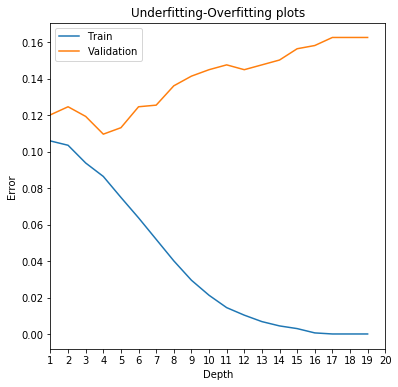

In [13]:
plt.figure(figsize=(6,6))               # Set Figure Size
plt.title('Underfitting-Overfitting plots')          # Main title of the plot
plt.ylabel('Error')                     # Y-Axis label
plt.xlabel('Depth')                     # X-Axis label
plt.xlim(1,20)                          # X-Axis limits
plt.xticks(range(1,21))                 # X-Axis ticks labels
plt.plot(1-np.array(acc_tr))            # Plot Training Accuracy Vs. Depth
plt.plot(1-np.array(acc_vl))            # Plot Validation Accuracy Vs Depth
plt.legend(['Train', 'Validation'])     # Add legend to the plot

In [14]:
accuracies = cross_val_score(clf, X=X_train, y=y_train, cv=5)

print(accuracies)

[0.85125184 0.84683358 0.86283186 0.87592319 0.85967504]


In [15]:

accuracies1 = cross_val_score(clf, X=X_val, y=y_val, cv=5)
print(accuracies1)


[0.85462555 0.81497797 0.84070796 0.82743363 0.86222222]


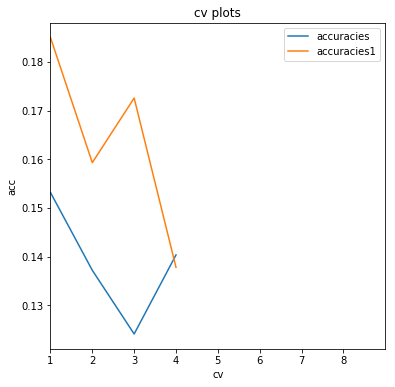

In [16]:
plt.figure(figsize=(6,6))               # Set Figure Size
plt.title('cv plots')          # Main title of the plot
plt.ylabel('acc')                     # Y-Axis label
plt.xlabel('cv')                     # X-Axis label
plt.xlim(1,9)                          # X-Axis limits
plt.xticks(range(1,9))                 # X-Axis ticks labels
plt.plot(1-np.array(accuracies))            # Plot Training Accuracy Vs. Depth
plt.plot(1-np.array(accuracies1))            # Plot Validation Accuracy Vs Depth
plt.legend(['accuracies', 'accuracies1'])